In [9]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from google.colab import drive

# 課題3
* 春学期に習った分類手法を使って、IMDbデータセットの感情分析をしてみよう。
 * training set / test setの分割は、そのまま使う。
 * training setをどのように使うかはお任せします。（交差検証など。）
 * test setでの分類性能をArea under the ROC curveで報告。

# データ読込む

In [10]:
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/NLP/課題３/imdb/'
texts = dict()
labels = dict()
for tag in ['train', 'test']:
  with open(f'{PATH}{tag}.npy', 'rb') as f:
    texts[tag] = np.load(f)
  with open(f'{PATH}{tag}_labels.npy', 'rb') as f:
    labels[tag] = np.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
X_train = texts["train"]
X_test = texts["test"]
y_train_label = labels["train"]
y_test_label = labels["test"]

In [12]:
print(X_train.shape, X_test.shape)
print(y_train_label.shape, y_test_label.shape)

(25000, 300) (25000, 300)
(25000,) (25000,)


In [13]:
X_train[0]

array([-6.23656902e-03,  3.19008320e-03,  1.26765687e-02,  4.70629483e-02,
       -2.32728198e-02, -1.39540937e-02,  6.75856741e-03,  2.31022888e-04,
       -7.19923759e-03,  9.05494485e-03, -5.49740251e-03, -1.42194796e-02,
        4.50190995e-03,  1.85107894e-03, -9.05315951e-03, -2.67426018e-03,
        1.88630726e-02, -6.34320779e-03, -2.78501697e-02,  3.91349616e-03,
        8.69853247e-04,  2.22917777e-02,  8.45212117e-03,  3.03217000e-03,
       -2.85647856e-03, -2.78765354e-02,  1.83808384e-03, -7.83364102e-03,
        2.27762107e-03,  5.26842810e-02, -1.32415304e-03,  3.05518880e-03,
        2.92475894e-03, -2.12690737e-02,  1.13277193e-02,  2.59457063e-03,
        8.47935118e-03,  5.61972149e-03,  5.52112702e-03, -6.82779821e-04,
       -1.28954567e-03, -7.78937945e-04, -2.44268076e-03,  1.19721163e-02,
       -7.83394650e-03,  8.46247468e-03, -2.01419718e-03, -1.18180895e-02,
       -2.24381369e-02,  1.39298718e-02,  3.50425509e-03,  7.14852475e-03,
       -8.17523524e-03,  

In [14]:
y_train_label[:100]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

# モデル構成

In [15]:
# パイプラインの用意
pipe = make_pipeline(SVC(kernel='rbf'))

# パラメータグリッドの準備
param_grid = {'svc__C':[0.1, 1, 10],
              'svc__gamma':[0.1, 1, 10]
             }

In [16]:
# グリッドサーチの実行
grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1, cv=3)

grid.fit(X_train, y_train_label)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('svc', SVC())]), n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [0.1, 1, 10]})

In [17]:
print("Best Train Score :", grid.best_score_)
print("Best Paramater   :", grid.best_params_)
print("Best Estimator   :", grid.best_estimator_)

Best Train Score : 0.8627200763576499
Best Paramater   : {'svc__C': 10, 'svc__gamma': 10}
Best Estimator   : Pipeline(steps=[('svc', SVC(C=10, gamma=10))])


# ROCで評価

In [18]:
best_model = grid.best_estimator_
y_test_predict = best_model.predict(X_test)

Text(0, 0.5, 'True Positive Rate')

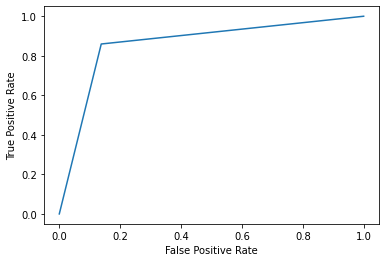

In [19]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test_label, y_test_predict)

# ROC曲線を描こう
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [20]:
# AUCの計算
roc_auc_score(y_test_label, y_test_predict)

0.8608800000000001